In [168]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [169]:
train_df = pd.read_csv('Final_Train_Dataset.csv')
test_df = pd.read_csv('Final_Test_Dataset.csv')

In [170]:
train_df.shape

(19802, 9)

In [171]:
train_df.tail()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
19797,19797,12-18 yrs,NaN,"Director, Medical Coding Training",NaN,"Medical Coding, ICD - 10, US Healthcare, RCM, ...",Hyderabad,15to25,2245
19798,19798,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, part time, home base, work fr...","Mumbai, Bengaluru, Chennai, Hyderabad, Dehradu...",0to3,4966
19799,19799,8-13 yrs,Annuities Domain experience is mandatory;Work ...,PM- C#/ .Net ( Annuity/ Insurance Domain),NaN,"SQL Server, VB.NET, C#, .Net, C#.Net, Oracle S...",Hyderabad,15to25,4272
19800,19800,1-3 yrs,- By plugging into our market-leading global n...,Consultant - Internal Audit,NaN,"accounting, internal audit, auditing, risk adv...",Pune,10to15,1793
19801,19801,2-5 yrs,- 3-5 years experience with the end to end pro...,Unity 3D Developer - Mobile Games Development,NaN,"IOS, XCode, Apple, Version Control, Perforce, ...",Hyderabad,10to15,1349


In [172]:
train_df['salary'].value_counts()

10to15    4500
15to25    4125
6to10     3533
0to3      3245
3to6      2824
25to50    1575
Name: salary, dtype: int64

In [173]:
train_df[0:10]

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305
5,5,5-10 yrs,4.\tWillingness to travel;5.\tExperience in Te...,Senior Trainer- Academics,NaN,"academics, effective communication, teacher tr...",Noida,6to10,4428
6,6,13-15 yrs,- Experience in managing fraud analytics with ...,Associate Vice President - Fraud Analytics - S...,Analytics,"Fraud Analytics, People Management Skills, Tea...",Delhi NCR,25to50,1988
7,7,6-10 yrs,Qualified Chartered Accountant with 1-3 yrs of...,Manager - Internal Audit - CA - Big4,NaN,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,6to10,1793
8,8,1-3 yrs,Proven experience as payroll executive or spec...,Payroll Executive,NaN,"esic, hr, bonus, pf, tds, payroll, superannuat...",Ahmedabad(Bodakdev),0to3,3398
9,9,2-6 yrs,Other activities as may be required over the p...,Required CA (manager Finance) for R&R Salons P...,NaN,"accounting standards, finance, auditing, finan...",Bengaluru(Kodihalli),15to25,3444


In [174]:
test_df.shape, train_df.shape

((6601, 7), (19802, 9))

In [175]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
experience              6601 non-null object
job_description         5079 non-null object
job_desig               6601 non-null object
job_type                1637 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
dtypes: int64(1), object(6)
memory usage: 361.1+ KB


In [176]:
X_train = train_df.drop(columns = ['Unnamed: 0','job_description', 'job_type','key_skills'])

In [177]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 5 columns):
experience              19802 non-null object
job_desig               19802 non-null object
location                19802 non-null object
salary                  19802 non-null object
company_name_encoded    19802 non-null int64
dtypes: int64(1), object(4)
memory usage: 773.6+ KB


In [178]:
labelenc = LabelEncoder()
X_train = X_train.apply(labelenc.fit_transform)

In [179]:
X_train[0:10]

,experience,job_desig,location,salary,company_name_encoded
0,105,9104,597,5,3687
1,19,4395,1412,1,458
2,107,3058,525,2,4195
3,113,1087,114,1,313
4,8,10385,811,4,1305
5,102,9583,1229,5,4428
6,42,1149,525,3,1988
7,108,6025,1301,5,1793
8,8,7236,11,0,3398
9,83,8076,180,2,3444


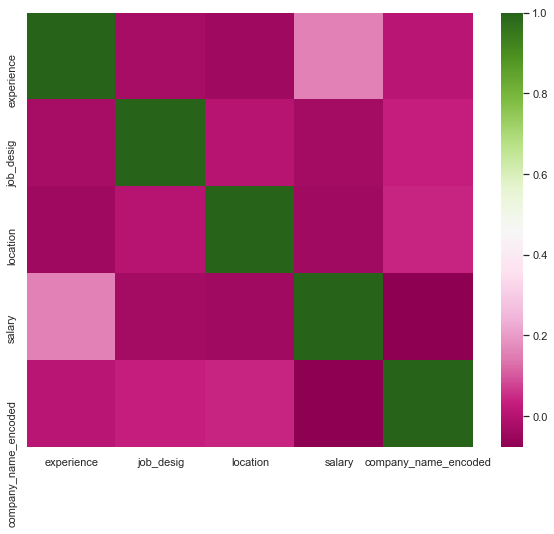

In [180]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), cmap="PiYG");

In [181]:
X_train['salary'].head()

0    5
1    1
2    2
3    1
4    4
Name: salary, dtype: int64

In [182]:
y_train = X_train['salary']

In [183]:
y_train.head()

0    5
1    1
2    2
3    1
4    4
Name: salary, dtype: int64

In [184]:
X_train = X_train.drop(columns=['salary'])

In [185]:
X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, 
                     test_size=0.3, random_state=17)

In [186]:
X_train.columns

Index(['experience', 'job_desig', 'location', 'company_name_encoded'], dtype='object')

In [187]:
X_train_part.shape, y_train_part.shape, X_valid.shape

((13861, 4), (13861,), (5941, 4))

In [188]:
y_train_part.head()

994      3
5800     5
807      2
11167    1
19673    0
Name: salary, dtype: int64

In [189]:
dtree = DecisionTreeClassifier( random_state = 17)
dtree.fit(X_train_part, y_train_part)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [190]:
y_pred = dtree.predict(X_valid)
accu1 = accuracy_score(y_valid, y_pred)
print(accu1)

0.3297424675980475


In [191]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score

params = {'max_depth': np.arange(2, 11), 'max_features': [3,4]}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
cv_dtree = GridSearchCV(estimator=dtree, param_grid=params, cv=skf, verbose=1)

In [192]:
cv_dtree.fit(X_train_part, y_train_part)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': [3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [193]:
cv_score = cross_val_score(estimator=cv_dtree, X=X_train_part, y=y_train_part, cv=skf)
print(cv_score)
print(cv_score.mean())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.7s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.8s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.8s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.8s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[0.41585586 0.39127299 0.4040404  0.37964634 0.3765343 ]
0.3934699765059171


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.8s finished


In [194]:
cv_dtree.fit(X_train, y_train)
print( cv_dtree.best_params_ )
print( cv_dtree.best_estimator_ )
print( 'Best score by CV: ', cv_dtree.best_score_ )
cv_y_pred = cv_dtree.predict(X_valid)
accu2 = accuracy_score(y_valid, cv_y_pred)
print("Validation Set Accuracy after hyperparam tuning (Depth=2 to 10): %.2f%%" % (accu2 * 100.0))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'max_depth': 9, 'max_features': 3}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')
Best score by CV:  0.4013735986264014
Validation Set Accuracy after hyperparam tuning (Depth=2 to 10): 44.34%


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    4.8s finished


In [195]:
cv_y_pred

array([1, 5, 2, ..., 2, 0, 2], dtype=int64)

In [196]:
cv_dtree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [197]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
experience              6601 non-null object
job_description         5079 non-null object
job_desig               6601 non-null object
job_type                1637 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
dtypes: int64(1), object(6)
memory usage: 361.1+ KB


In [198]:
X_test = test_df.drop(columns = ['job_description','job_type','key_skills'])

In [199]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 4 columns):
experience              6601 non-null object
job_desig               6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
dtypes: int64(1), object(3)
memory usage: 206.4+ KB


In [200]:
X_test = X_test.apply(labelenc.fit_transform)

In [201]:
y_pred = cv_dtree.predict(X_test)

In [202]:
y_pred.shape

(6601,)

In [203]:
y_pred[0:5]

array([2, 0, 3, 0, 0], dtype=int64)

In [204]:
df = pd.DataFrame(y_pred)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 1 columns):
0    6601 non-null int64
dtypes: int64(1)
memory usage: 51.6 KB


In [205]:
df.columns = ['sal']

In [206]:
#not the best way, but mapping it back to string so as to be able to make a submission
df['sal'] = df['sal'].astype(str)
vals_to_replace = {'0':'0to3', '1':'10to15', '2':'15to25', '3':'25to50', '4':'3to6', '5':'6to10'}
df['salary'] = df['sal'].map(vals_to_replace)

In [207]:
df = df.drop(columns=['sal'])

In [208]:
df.to_csv('test.csv')

## Results until now
 
Decision tree has given results only for an accuracy of 0.40 - on submission, gave only 0.248 score on the leaderboard.
Let us try other options.

In [209]:
X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, test_size=0.3, random_state=17)

In [210]:
X_train_part.head()

,experience,job_desig,location,company_name_encoded
994,95,7943,525,1353
5800,113,10988,1027,2491
807,120,5611,114,5032
11167,111,6238,811,2550
19673,4,5153,811,3055


In [211]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
logit = LogisticRegression(random_state=17, class_weight='balanced')

logit_pipe = Pipeline([('scaler', scaler), ('logit', logit)])
logit_pipe_params = {'logit__C': np.logspace(-8, 8, 17)}

In [212]:
pipeline_cv = GridSearchCV(estimator=logit_pipe, param_grid=logit_pipe_params, cv=skf, verbose=1)
cv_score = cross_val_score(estimator=pipeline_cv, X= X_train_part, y=y_train_part, cv=skf)
print(cv_score)
print(cv_score.max(), cv_score.mean())

pipeline_cv.fit(X_train, y_train)
pipeline_cv.score
pipeline_cv.best_estimator_, pipeline_cv.best_params_, pipeline_cv.best_score_

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.9s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.9s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.9s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    4.0s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.9s finished


[0.31243243 0.30147854 0.31890332 0.30386142 0.31444043]
0.3189033189033189 0.31022322990244616
Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    7.2s finished


(Pipeline(memory=None,
      steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logit', LogisticRegression(C=1e-05, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=17,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
 {'logit__C': 1e-05},
 0.31284718715281284)

In [213]:
y_pred_pp = pipeline_cv.predict(X_test)

In [214]:
y_pred_pp.shape

(6601,)